# Assignment week 2, exploratory data analysis

---

In this weeks assingment I investigate the rest of the "steps" and "survey" CSV file.
To start with this assignment, i need to load in every obligatory element of this file.

We need:
Seaborn,
Pandas,
Matplotlib,
steps.csv & survey.csv.

After this I'll show the .head of both CSV files to see whats in the data frames

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

step_data = pd.read_csv('steps.csv', sep=";") #sep=";" for reformatting the CSV file.
survey_data = pd.read_csv('survey.csv')

step_data.head(3) #dont need more than 3/5 rows to show.

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN


### Merge the two data frames
---

Now that I know that the dataframe contains a lot of "NaN", i want to replace them with 0.
This will come in handy later when I will calculate the "pearsons R".

Also, to further 'clean' the data I will merge both the dataframes.
for this I will use the commant '.merge(step_data, on ='id").

In [2]:
df = survey_data.merge(step_data, on = "id") #merge the data on ID, so the ID of the participants in the survey.csv and in the steps.csv line up nicely
df = df.fillna(0)

df['mean'] = df.loc[:, '20-6-2013':'13-5-2014'].mean(numeric_only=True, axis=1)
#after merging, give the dataframe a new column, make it the mean/or steps per day for the steps taken between
# 20-6-2013 and 13-5-2014. After this is done show the head of the DF.

df.head() 

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5133.875000
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2826.371951
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0,3745.902439
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,221.536585
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,874.557927


### Make a subset for 2 quantitative variables, and what is their relation to the mean?

---

I've chosen to take the two *quantitative* variables: 'height, and 'weight'. Only to look at that weight and/or height is relatable to steps taken (per day).

In [3]:
df_subset = df[['mean', 'height', 'weight']]

#df_subset = df_subset[df_subset['mean'] > 800 ] #i've chosen to undo this step, because there are a lot of outliers under 800.
df_subset = df_subset[df_subset['height'] > 40 ] #i think there aren't a lot of people that are smaller than 40 CM i guess?
df_subset = df_subset[df_subset['weight'] < 200]

df_subset.head()

,mean,height,weight
0,5133.875000,178.0,98.0
1,2826.371951,180.0,77.0
2,3745.902439,180.0,83.0
3,221.536585,178.0,80.0
4,874.557927,167.0,61.0


To make this table a lot more scannable, I've decided to make it into a pairplot (just for the fun of the assignment, and to easier see the differences between each variable).

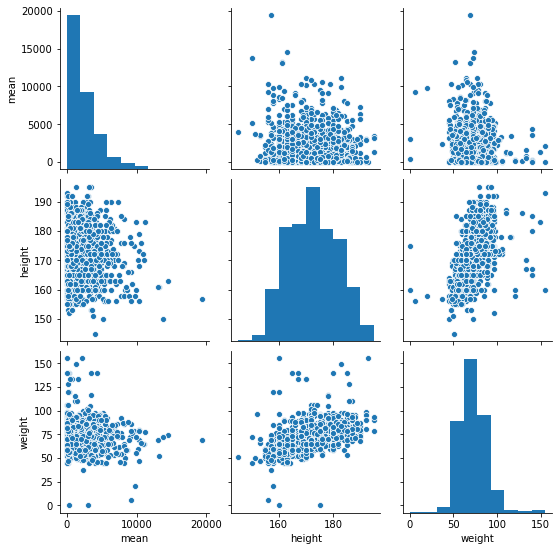

In [4]:
sns.pairplot(df_subset)
plt.show()

### Show the correlation in a nice little heatmap/matrix

---

To make a little bit more sense of the data i've put it in a correlation matrix.
For this, i've used the "scipy.stats.stats" (import as pearsonsr).

With this, I've made a variable corr of my subset.


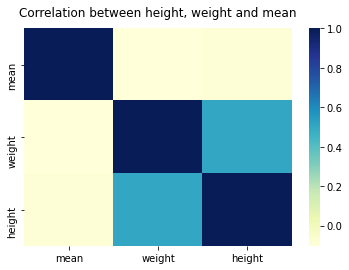

In [5]:
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy

corr = df_subset[['mean', 'weight', 'height']].corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu") #the last two arguments set the column names
plt.title('Correlation between height, weight and mean', fontdict={'fontsize':12}, pad=12);

plt.show()

What I can see from this correlation matrix is that the weight and height have a moderate positive correlation with each other. 

*(0.8 > r > 0.4)*

This could mean that the 'higher' someone is (or how long someone is), the more weight they could have.

### Scattered scatterplots!

---

To show more of the relations to the mean, I've made three scatterplots to show off the data.

The first plot, we can see that the height is more tilted to the left side of the graph, showing not a clear relation.

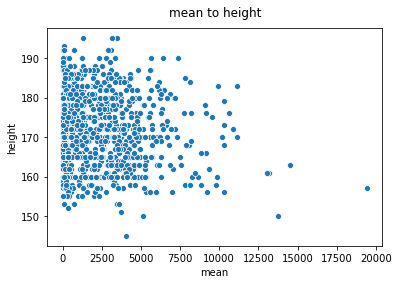

In [6]:
sns.scatterplot(data=df_subset, x="mean", y="height")
plt.title('mean to height', fontdict={'fontsize':12}, pad=12);
plt.show()

---

The second scatterplot (mean to weight) shows an almost vertical line, still this isn't a clear indication of a correlation.

Further more this more concludes a bit more of an 'weak' or 'no' correlation at all.


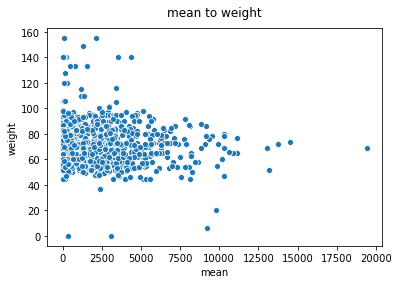

In [7]:
sns.scatterplot(data=df_subset, x="mean", y="weight")
plt.title('mean to weight', fontdict={'fontsize':12}, pad=12);
plt.show()

---

This last scatterplot I've put in to see the correlation between "weight and height", the line is a bit more linear, thus suggesting there could be a correlation there.

Also, to give the graph a more graphical appeal i've decided to add the 'mean' as an hue.

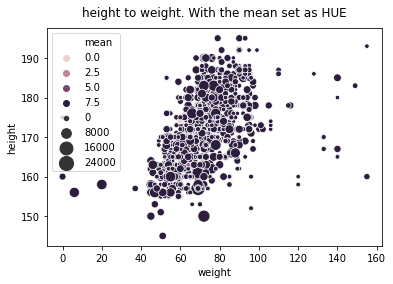

In [8]:
sns.scatterplot(data=df_subset, x="weight", y="height", hue="mean", hue_norm=(0, 7), size="mean", sizes=(20, 200))
plt.title('height to weight. With the mean set as HUE', fontdict={'fontsize':12}, pad=12);
plt.show()

## Pearsons R, and a correlation table

---

To further more express the correlation between the three variables i've put them into an correlation table.

I first started to print the pearsonsr of the mean and weight/height.

After that i've put in into the table.


In [9]:
print(pearsonr(df['mean'],df['height']))
print(pearsonr(df['mean'],df['weight']))

corr = df_subset[['mean', 'height', 'weight']].corr()
corr

(-0.06331764298206506, 0.053702574636943876)
(-0.04215569458553142, 0.19923808957922326)


,mean,height,weight
mean,1.000000,-0.085715,-0.102286
height,-0.085715,1.000000,0.506567
weight,-0.102286,0.506567,1.000000


From this we can see that the mean is an absolute 1 (because we're measuring with the mean, and see what other variables has an relation to it).
What we can see from the table is that the variable weight and height has no strong indication of an positive correlation, but instead have a strong *negative* correlation (weight: -0.102286 and height: 0.085715).

What we _can_ see from this table is that the variables height and weight _do have_ an correlation with each other.

The R value for these values is between 0.8 > r > 0.4, as stated above.
This means that the correlation is: Moderate positive linear correlation.

There is an moderate correlation between height and weight in this data set!

---

## Relation of mean steps per perticipant with a qualitative variable with two leves; here gender and city!

I've chosen for gender because it's easier to illustrate the differences between gender, to take it a little bit further i've chosen to take the variable city with it, to illustrate the relation.

For this i've decided to make another subset, i've called it "df_subset2".

In [10]:
df_subset2 = df[['mean', 'gender', 'city']]

#df_subset2 = df_subset2[df_subset2['mean'] > 2000]

### Violin plot for stats.

---

I've made a violin plot to see what city walked the most persons per gender in relation to the steps per day (mean).

What we can see is that in Bordeaux there was the highest concentration of most steps taken per day (as we can see with the mean).

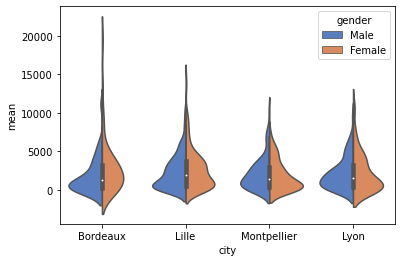

In [11]:
sns.violinplot(x="city", y="mean", hue="gender", data=df_subset2, palette="muted", split=True)

### Bar chart for the same stats

---

To even further illustrate the difference between participents per city and gender, i've made an barchart to illustrate the 'gap' between genders.

What we can see from this is that in the city of Lille there almost as much male as females participants, while in Montpellier there are more Male then Female participants.


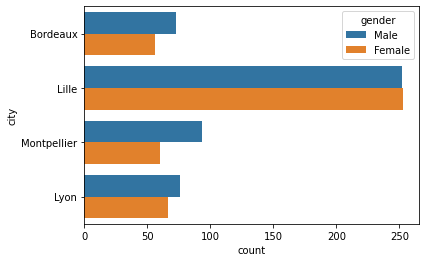

In [12]:
sns.countplot(y="city", hue="gender", data=df_subset2)
plt.show()

### Relation between two qualitative variables (City and Gender)

---

To furthermore illustrate the relation between the two variables, city and gender I've made a barchart, with the stacked bars to illustrate the distribution between male and female participants per city from the survey.

First put it in a crosstab table, and to illustrate it showed it in a barchart.

In [13]:
pd.crosstab(df_subset2["gender"], df_subset2["city"])

city,Bordeaux,Lille,Lyon,Montpellier
gender,,,,
Female,56,253,66,60
Male,73,252,76,93


Text(0.5, 1.0, 'Percentages of male to female ratio of data')

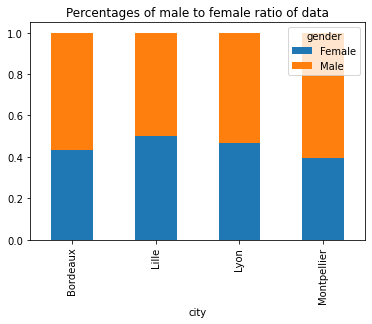

In [14]:
pd.crosstab(df_subset2.city, df_subset2.gender, normalize='index').plot.bar(stacked=True)
plt.title('Percentages of male to female ratio of data')